In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv('updated_version.csv')
data.head(3)

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   sex                1000 non-null   int64  
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   int64  
 8   diabetes           1000 non-null   int64  
 9   heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.3 KB


In [4]:
for i in ['total_cholesterol','ldl','hdl','systolic_bp','diastolic_bp']:
    data[i] = data[i].astype('int64')

In [5]:
data.head(3)

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229,175,39,124,91,0,0,0
1,58,1,186,128,34,95,64,1,0,0
2,37,1,251,152,45,99,64,0,1,0


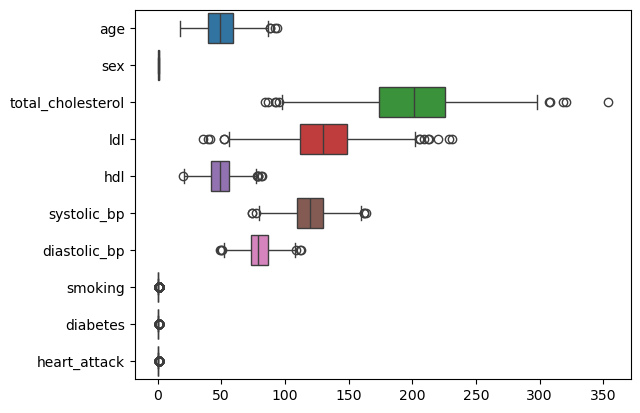

In [6]:
sns.boxplot(data=data,orient='h')
plt.show()

In [7]:
def wisker(col):
    q1,q3=np.percentile(col,[10,80])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [8]:
data.columns

Index(['age', 'sex', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp',
       'diastolic_bp', 'smoking', 'diabetes', 'heart_attack'],
      dtype='object')

In [9]:
for i in ['age', 'sex', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp','diastolic_bp']:
    lw,uw=wisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])

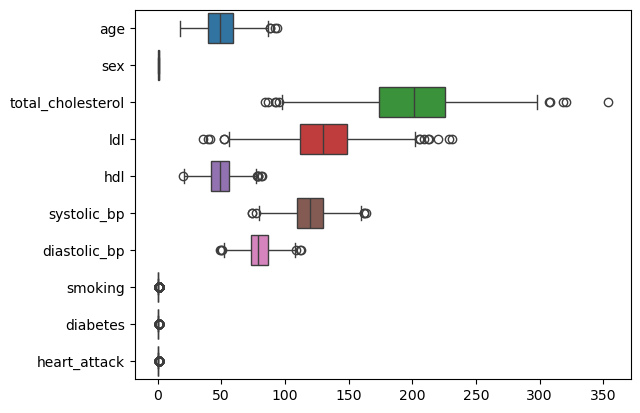

In [10]:
sns.boxplot(data=data,orient='h')
plt.show()

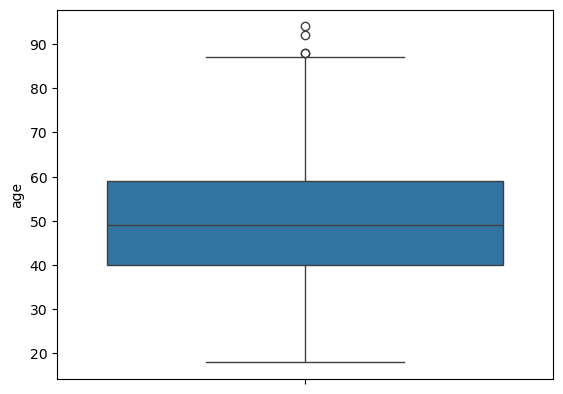

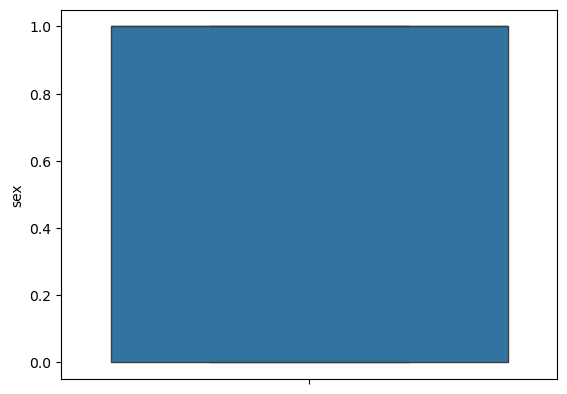

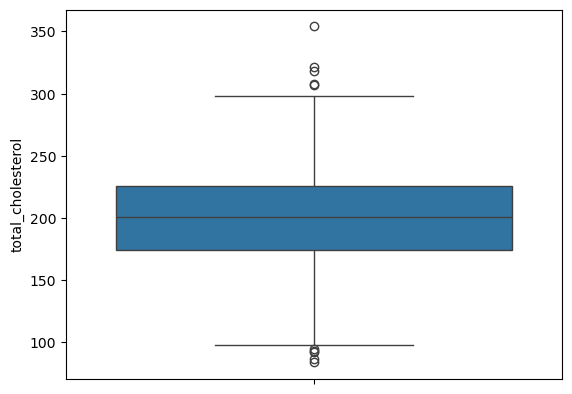

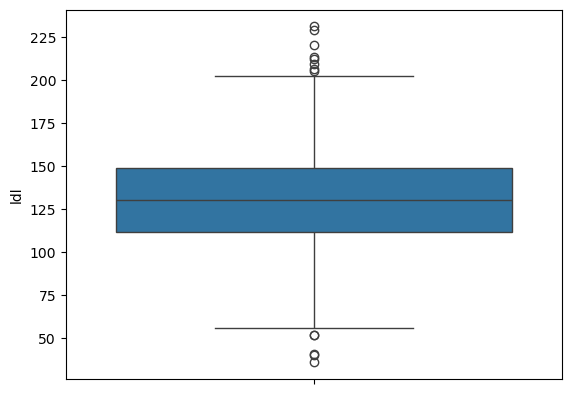

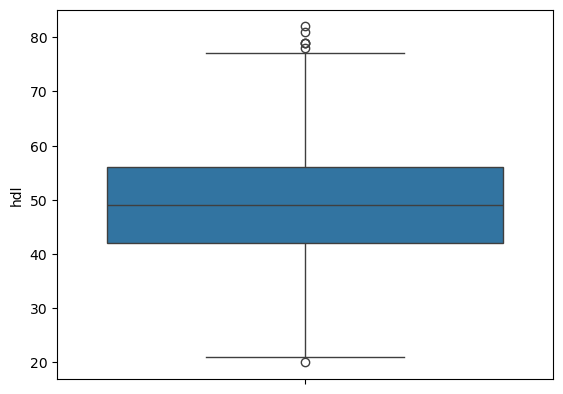

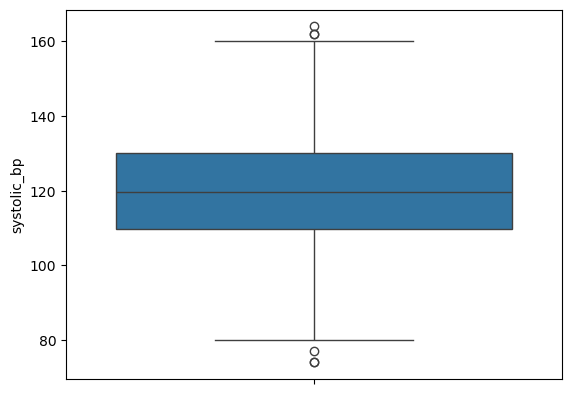

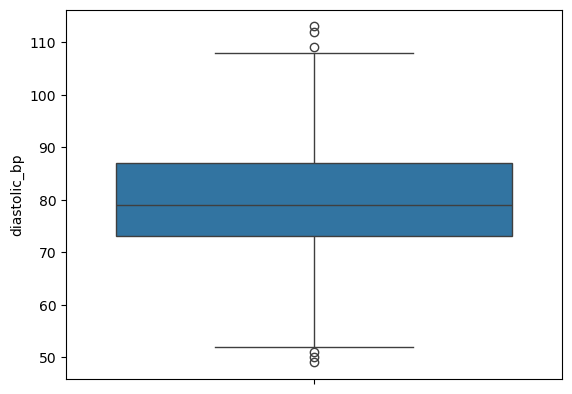

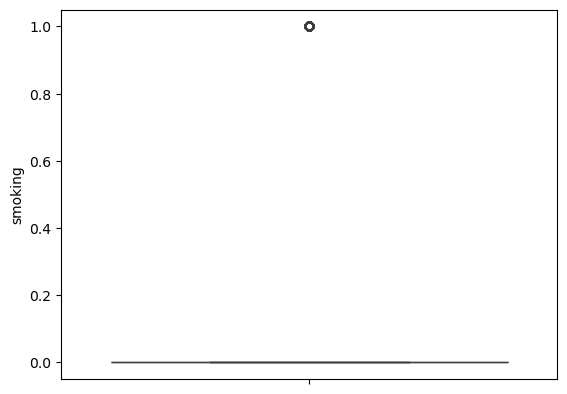

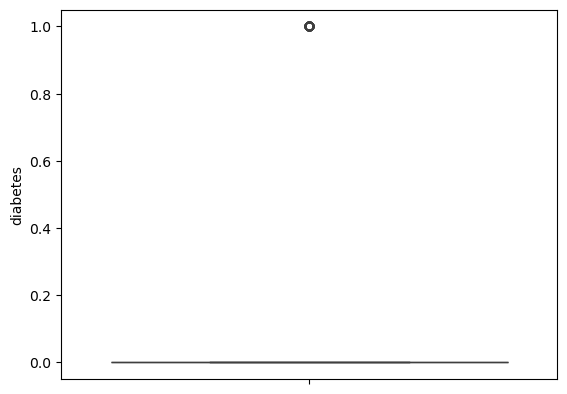

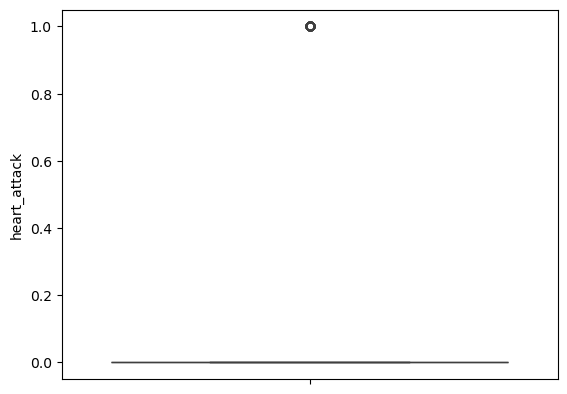

In [12]:
for i in ['age', 'sex', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp','diastolic_bp','smoking', 'diabetes', 'heart_attack']:
    sns.boxplot(data[i])
    plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [18]:
X = data.drop('heart_attack',axis=1)
y = data['heart_attack']


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # liblinear supports l1 and l2
    'class_weight': [None, 'balanced']
}

logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [23]:
lr = LogisticRegression(C =1, class_weight ='balanced', penalty= 'l1', solver= 'liblinear')
lr.fit(X_train,y_train)

LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [29]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [30]:
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()

In [31]:
ABC.get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

ABC = AdaBoostClassifier()
grid_search = GridSearchCV(ABC, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)


Best params: {'learning_rate': 0.1, 'n_estimators': 100}


In [39]:
ABC = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)
ABC.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [40]:
y_pred = ABC.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [42]:
accuracy_score(y_test,y_pred)*100

90.5

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('updated_version.csv')
data

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,65,1,195.336429,149.070951,43.914928,132.878440,86.246414,0,0,0
996,60,1,192.342928,134.357395,53.380714,145.149535,91.069141,0,0,0
997,70,0,174.179319,125.900047,50.406918,133.022878,85.851330,0,0,0
998,48,0,189.715685,152.388737,40.700912,113.527965,86.368294,0,0,0


In [3]:
for i in ['total_cholesterol','ldl','hdl','systolic_bp','diastolic_bp']:
    data[i] = data[i].astype('int64')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                1000 non-null   int64
 1   sex                1000 non-null   int64
 2   total_cholesterol  1000 non-null   int64
 3   ldl                1000 non-null   int64
 4   hdl                1000 non-null   int64
 5   systolic_bp        1000 non-null   int64
 6   diastolic_bp       1000 non-null   int64
 7   smoking            1000 non-null   int64
 8   diabetes           1000 non-null   int64
 9   heart_attack       1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


In [5]:
X = data.drop('heart_attack',axis=1)
y = data['heart_attack']

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor,RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
cat = data.select_dtypes(include=['object']).columns
num = data.select_dtypes(include=['int64']).columns

In [9]:
num = num.drop(['heart_attack'])
num

Index(['age', 'sex', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp',
       'diastolic_bp', 'smoking', 'diabetes'],
      dtype='object')

In [11]:
num_pipe = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])


cat_pipe = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

prep_pipe = ColumnTransformer(transformers=[
    ('num',num_pipe,num),
    ('cat',cat_pipe,cat)])
cls = {
    'AdaBoost':AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100),
    'GradiantBoosting':GradientBoostingClassifier(random_state=42),
    'XGBoost':XGBClassifier(random_state=42,objective='reg:squarederror'),
    'DTC':DecisionTreeClassifier(),
    'RFC':RandomForestClassifier(),
    'knn_cl':KNeighborsClassifier(n_neighbors=5,metric='l2'),
    'LR':LogisticRegression(C =1, class_weight ='balanced', penalty= 'l1', solver= 'liblinear')}

In [12]:
for name,model in cls.items():
    print('=======')
    pipe = Pipeline(steps=[
    ('preprocessor',prep_pipe),
    ('model',model)
    ])
    pipe.fit(X_train,y_train)
    print('Fitting for',name,'Classification')
    y_pred = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    acc = accuracy_score(y_test,y_pred)
    print(f'{name}_rmse = {rmse}')
    print(f'{name}_acc = {acc}')
    print('______________________\n')

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting for AdaBoost Classification
AdaBoost_rmse = 0.2449489742783178
AdaBoost_acc = 0.94
______________________

Fitting for GradiantBoosting Classification
GradiantBoosting_rmse = 0.2645751311064591
GradiantBoosting_acc = 0.93
______________________

Fitting for XGBoost Classification
XGBoost_rmse = 0.282842712474619
XGBoost_acc = 0.92
______________________

Fitting for DTC Classification
DTC_rmse = 0.37416573867739417
DTC_acc = 0.86
______________________

Fitting for RFC Classification
RFC_rmse = 0.2449489742783178
RFC_acc = 0.94
______________________

Fitting for knn_cl Classification
knn_cl_rmse = 0.27386127875258304
knn_cl_acc = 0.925
______________________

Fitting for LR Classification
LR_rmse = 0.4301162633521313
LR_acc = 0.815
______________________



In [13]:
import pickle

In [14]:
with open("heart_attack_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved!")

✅ Model saved!
